In [1]:
#ok for this we're going to find the most probable value (aka the mode) of the scintillator QDC counts and compare them to voltage in a lovely graph

In [3]:
from ROOT import TFile, TCanvas, TH1D
import numpy as np
runNumbers =["1572128197", "1571992354", "1572199259", "1571991208", "1572167586"]
#other voltages: "1572097787",  "1572097505",  "1572187615", "1572169691", "1572167644", "1572001725", "1572002093"      


In [9]:
#for sam: why did you do the iterat mod 4 in the cell w the comment 'not function graph scint'
#Using the 1cm data to compare the voltages

from ROOT import TF1
import matplotlib.pyplot as plt

#means for 1cm scintillator 
scintMeans1cm = []
holdScint = []
fitti = TF1('fitti', 'landau')

#make it a function so we can run it on any scintillator/voltage
def fittiGraph(runNums):
    #variables
    scintMeans = []
    holdScint = []
    fitti = TF1('fitti', 'landau')
    
    
    if runNums == []:
        return scintMeans
    else:
        runName = "/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + runNums[0] + ".root"
        importFile = TFile(runName, "READ")
        RAWdata = importFile.Get("RAWdata")
        
        #draw the hist of the run with landau dist
        hist1 = TH1D("name", "hist", 100, 200, 3800)
        RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
        hist1.Fit(fitti)
        
        #store the landau MPV and mean
        holdScint = [(fitti.GetParameter("MPV"), hist1.GetMean())]
        scintMeans = [(np.mean([i[0] for i in holdScint]), np.mean([i[1] for i in holdScint]))]
        
        return scintMeans + fittiGraph(runNums[1:])
            
fittiGraph(runNumbers)        
        
        

[(1186.3129653436044, 1437.3191753701944),
 (1418.4260863284785, 1688.8160825933903),
 (3107.8693611947583, 3206.90238375021),
 (3011.647831695596, 3132.457529668338),
 (4220.43581215429, 3654.392105263158)]

 FCN=2981.87 FROM MIGRAD    STATUS=CONVERGED     201 CALLS         202 TOTAL
                     EDM=8.11211e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.36695e+04   2.79692e+02  -3.83675e-01  -1.35495e-07
   2  MPV          1.18631e+03   4.51308e-01   6.27897e-04  -1.26604e-05
   3  Sigma        6.62289e+01   2.80288e-01  -7.92052e-08  -1.48699e-01
 FCN=1173.98 FROM MIGRAD    STATUS=CONVERGED     198 CALLS         199 TOTAL
                     EDM=7.17986e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   3.6 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.76806e+04   1.47340e+02   2.90594e+00  -4.13792e-06
   2  MPV          1.41843e+03   8.53444e-01  -5.53866e-03   4.39963e-04
   3  S

[(2353.6174823190927, 2491.1135592299997)]
 FCN=2657.52 FROM MIGRAD    STATUS=CONVERGED     206 CALLS         207 TOTAL
                     EDM=3.75109e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.22038e+04   3.26203e+02   4.92074e+00  -3.23832e-06
   2  MPV          5.45703e+02   4.03896e-01   9.95182e-03  -1.36046e-03
   3  Sigma        4.02521e+01   2.52584e-01   1.03871e-05  -1.40870e+00
 FCN=152.26 FROM MIGRAD    STATUS=CONVERGED     111 CALLS         112 TOTAL
                     EDM=2.10345e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.70635e+03   4.93246e+01   2.06602e-01   1.03580e-05
   2  MPV          3.10787e+03   3.20217e+00   1.38976e-02   2.0

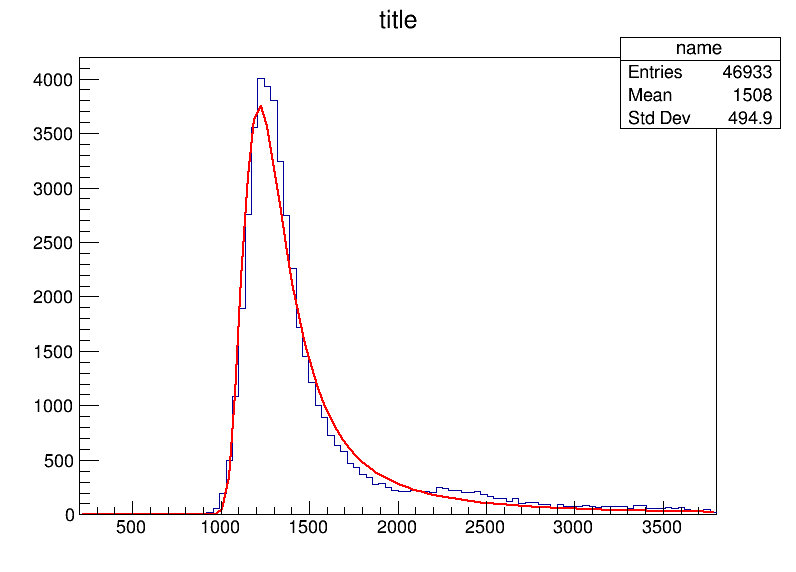

In [12]:
#not function graph scint
#surprise suprise Sam's code worked. Let's do it again for this first plot - 
#Now we're going to do it for all the ones in our runNumbers array
iterat=1
maxum=12

scintMeans=[]
holdScint=[]

fitti=TF1("fitti", "landau")

for run in runNumbers:
    runName="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile = TFile(runName, "READ")
    RAWdata=importFile.Get("RAWdata")
    hist1=TH1D("name", "title", 100, 200, 3800)

    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    hist1.Fit(fitti)

    holdScint+=[(fitti.GetParameter("MPV"), hist1.GetMean())] #store both the Landau MPV and mean to our hold
    if iterat%4==0:
        scintMeans+=[(np.mean([i[0] for i in holdScint]), np.mean([i[1] for i in holdScint]))] #and then calculate both their means and store it
        holdScint=[]
    iterat+=1
    if iterat>maxum:
        break
    
c1.Draw()
print(scintMeans)

[(545.7025824505193, 705.8504682389746), (3107.869361140928, 3206.90238375021), (2883.0816607583715, 3028.307662657008), (2877.8163249265517, 3023.393722273806), (3011.6478308159903, 3132.457529668338), (1237.2202534845203, 1508.128118807662)]
 FCN=2657.52 FROM MIGRAD    STATUS=CONVERGED     206 CALLS         207 TOTAL
                     EDM=3.75109e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.22038e+04   3.26203e+02   4.92074e+00  -3.23832e-06
   2  MPV          5.45703e+02   4.03896e-01   9.95182e-03  -1.36046e-03
   3  Sigma        4.02521e+01   2.52584e-01   1.03871e-05  -1.40870e+00
 FCN=152.26 FROM MIGRAD    STATUS=CONVERGED     111 CALLS         112 TOTAL
                     EDM=2.10345e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   

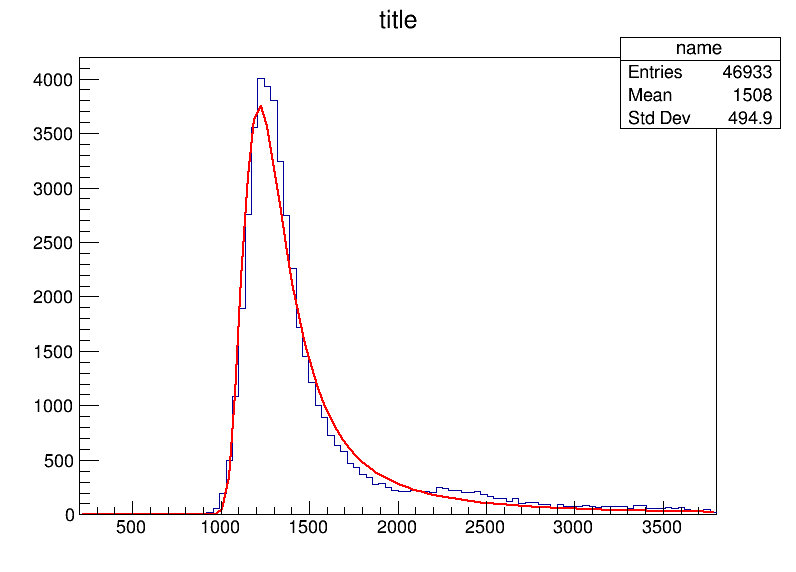

In [17]:
runNumbers=["1572187615", "1572199259", "1572169691", "1572167644", "1571991208","1572001725"]
from ROOT import TF1, TFile, TCanvas, TH1D
import numpy as np
import matplotlib.pyplot as plt
iterat=1
maxum=6

scintMeans=[]
holdScint=[]

fitti=TF1("fitti", "landau")

for run in runNumbers:
    runName="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile = TFile(runName, "READ")
    RAWdata=importFile.Get("RAWdata")
    hist1=TH1D("name", "title", 100, 200, 3800)

    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    hist1.Fit(fitti)

    holdScint+=[(fitti.GetParameter("MPV"), hist1.GetMean())] #store both the Landau MPV and mean to our hold
    if iterat%1==0:
        scintMeans+=[(np.mean([i[0] for i in holdScint]), np.mean([i[1] for i in holdScint]))] #and then calculate both their means and store it
        holdScint=[]
    iterat+=1
    if iterat>maxum:
        break
    
c1.Draw()
print(scintMeans)

[(4220.43581215429, 3654.392105263158), (1698.231985841211, 1973.8316003298405)]
 FCN=15.7375 FROM MIGRAD    STATUS=CONVERGED     166 CALLS         167 TOTAL
                     EDM=3.74381e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.13072e+02   2.74660e+02   6.41373e-02   1.02567e-05
   2  MPV          4.22044e+03   2.36842e+02   1.69808e-02   5.56046e-06
   3  Sigma        3.15005e+02   8.31712e+01   1.21555e-05  -3.17056e-02
 FCN=1543.72 FROM MIGRAD    STATUS=CONVERGED     163 CALLS         164 TOTAL
                     EDM=1.37712e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.66120e+04   1.20322e+02   2.82217e-01  -8.15394e-06
   2  MPV   

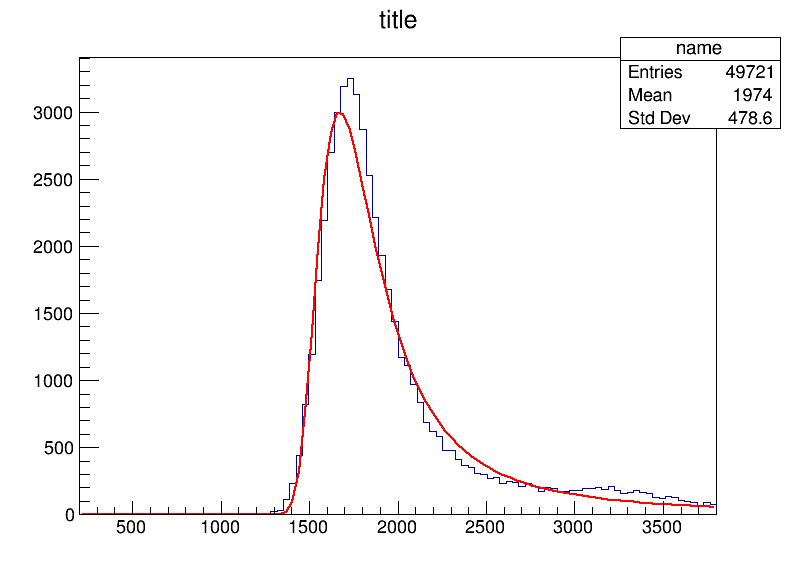

In [3]:
runNumbers=["1572167586","1572002093"]
from ROOT import TF1, TFile, TCanvas, TH1D
import numpy as np
import matplotlib.pyplot as plt
iterat=1
maxum=2

scintMeans=[]
holdScint=[]

fitti=TF1("fitti", "landau")
c1=TCanvas("MimosaPlots", "MimosaPlots", 800, 600)

for run in runNumbers:
    runName="/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/" + run + ".root"
    importFile = TFile(runName, "READ")
    RAWdata=importFile.Get("RAWdata")
    hist1=TH1D("name", "title", 100, 200, 3800)

    RAWdata.Draw("QDC0_ch0>>name", "QDC0_ch0<3800 && QDC0_ch0>200")
    hist1.Fit(fitti)

    holdScint+=[(fitti.GetParameter("MPV"), hist1.GetMean())] #store both the Landau MPV and mean to our hold
    if iterat%1==0:
        scintMeans+=[(np.mean([i[0] for i in holdScint]), np.mean([i[1] for i in holdScint]))] #and then calculate both their means and store it
        holdScint=[]
    iterat+=1
    if iterat>maxum:
        break
    
c1.Draw()
print(scintMeans)